<a href="https://colab.research.google.com/github/hancelpv/backups/blob/main/Aryng_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# !wget --no-check-certificate "https://onedrive.live.com/download?cid=7826868B5519D33D&resid=7826868B5519D33D%21147165&authkey=AGyKxUIfkTucjdM"

In [15]:
# !wget --no-check-certificate "https://onedrive.live.com/download?cid=7826868B5519D33D&resid=7826868B5519D33D%21147166&authkey=ANeXGA4saNcf9Dc"

In [54]:
!cp "drive/My Drive/Python Utilities/utils.py" .

In [53]:
import utils
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv("Aryng_Final_Project.csv")
test = pd.read_csv("Aryng_Final_Project_TEST.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (24,27,28,29,30,31,34,35,36,37,38,40) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
train.shape

(2078960, 57)

In [5]:
test.shape

(2574346, 58)

In [6]:
train = utils.reduce_mem_usage(train)
test = utils.reduce_mem_usage(test)

Memory usage of dataframe is 890.21 MB
Memory usage after optimization is: 380.67 MB
Decreased by 57.2%
Memory usage of dataframe is 1139.16 MB
Memory usage after optimization is: 481.20 MB
Decreased by 57.8%


In [9]:
train.isnull().sum()

obs_e-comm_rev                  2049734
obs_numb_trans                  1928905
ten_e-comm_rev                  1798781
ten_numb_trans                        0
obs_avg_prate                   1754380
obs_numb_prod_rate              1754380
ten_avg_prate                    918971
ten_numb_prod_rate               918971
obs_avg_ab_rate                 1858907
obs_numb_ab_rate                1858907
ten_avg_ab_rate                  941629
ten_numb_ab_rate                 941629
ten_total_point_e                450108
ten_total_point_u               1751762
obs_or                           675492
obs_ctr                         1069535
obs_or_abp                      1023284
obs_ctr_abp                     1648427
ten_or                            90038
ten_ctr                          149603
numb_abp_l_visits               1515578
numb_abp_plan_visits            1515578
time_on_web                     1115695
credit_debit                        664
ten_months_user                     927


In [10]:
train.sample(5)

,obs_e-comm_rev,obs_numb_trans,ten_e-comm_rev,ten_numb_trans,obs_avg_prate,obs_numb_prod_rate,ten_avg_prate,ten_numb_prod_rate,obs_avg_ab_rate,obs_numb_ab_rate,ten_avg_ab_rate,ten_numb_ab_rate,ten_total_point_e,ten_total_point_u,obs_or,obs_ctr,obs_or_abp,obs_ctr_abp,ten_or,ten_ctr,numb_abp_l_visits,numb_abp_plan_visits,time_on_web,credit_debit,ten_months_user,age_at_signup,signup_source_group,first_subscribe_source_group,first_prod,type_first_sub,device,hhi,ten_months_sub,first_order,comfortness_makeup,color_eye,color_hair,tone_skin,numb_bp_chosen,sub_4_gp,revenue,returns,cashback,skin_care,hair_care,concerns_skin,fragrance_preference,other,shp_blush_freq,shp_eye_prod_freq,shp_lip_prod_freq,shp_nail_prod_freq,freq_face_makeup,freq_eye_makeup,freq_lip_makeup,count_shopping_channel,numb_brand_pref
1985690,NaN,NaN,24.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.117647,0.294118,2.0,0.333333,1.675325,0.480519,NaN,NaN,1628.0,Debit,5.133333,27.0,Social,Social,AB,Monthly,Android Mobile,63682.0,5,1.0,Somewhat Comfortable,Green,Light Brown,Tan / Olive,18.0,Churned,36.0,0.0,0.0,3.0,3.0,35.0,2.0,14.0,10.0,24.0,10.0,14.0,17.0,5.0,12.0,3.0,18.0
1505022,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.226667,0.040000,NaN,NaN,NaN,Credit,12.900000,28.0,Social,Email,AB,Monthly,Android Mobile,83875.0,7,1.0,Somewhat Comfortable,Green,Blonde,Light,5.0,AB,NaN,NaN,NaN,2.0,2.0,26.0,5.0,7.0,7.0,12.0,5.0,6.0,12.0,3.0,8.0,4.0,5.0
278694,NaN,NaN,NaN,0.0,NaN,NaN,4.1,10.0,NaN,NaN,4.0,2.0,270.0,NaN,NaN,NaN,NaN,NaN,0.070175,0.030702,NaN,NaN,NaN,Debit,51.299999,28.0,Organic,Email,AB,Monthly,iOS Mobile,55372.0,6,0.0,Somewhat Comfortable,Blue,Light Brown,Light,6.0,AB,NaN,NaN,NaN,2.0,2.0,25.0,0.0,7.0,10.0,22.0,8.0,12.0,15.0,3.0,10.0,0.0,6.0
1950976,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.162162,0.054054,NaN,NaN,NaN,Credit,5.633333,29.0,Paid,Paid,AB,Monthly,iOS Mobile,76464.0,6,1.0,Very Comfortable,Brown,Blonde,Fair,7.0,Churned,NaN,NaN,NaN,2.0,2.0,29.0,3.0,9.0,10.0,22.0,8.0,12.0,20.0,6.0,9.0,4.0,7.0
1930143,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Debit,5.900000,36.0,Paid,Paid,AB,Monthly,iOS Mobile,56349.0,6,1.0,Somewhat Comfortable,Hazel,Light Brown,Light,9.0,AB,NaN,NaN,NaN,1.0,1.0,33.0,0.0,13.0,8.0,19.0,7.0,12.0,20.0,4.0,12.0,7.0,9.0


In [12]:
target = 'sub_4_gp'

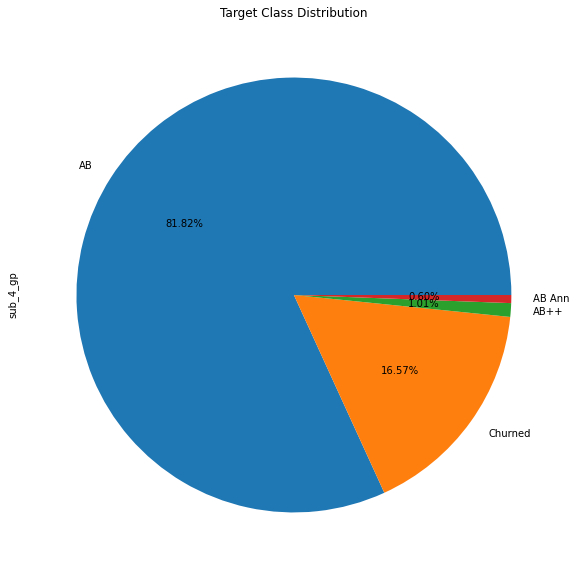

In [20]:
train[target].value_counts().plot.pie(figsize=(16, 10),autopct='%1.2f%%');
plt.title("Target Class Distribution - Train set");

In [30]:
treshold = 0.8

In [33]:
cols_with_nulls = list(train.columns[train.isnull().mean() > treshold])

In [34]:
train.drop(cols_with_nulls, axis=1, inplace=True)
test.drop(cols_with_nulls, axis=1, inplace=True)

In [35]:
train.shape

(2078960, 49)

In [36]:
test.shape

(2574346, 50)

In [39]:
train.fillna(train.mode().iloc[0], inplace=True)
train.fillna(train.median(), inplace=True)

In [41]:
train.sample(5)

,ten_numb_trans,ten_avg_prate,ten_numb_prod_rate,ten_avg_ab_rate,ten_numb_ab_rate,ten_total_point_e,obs_or,obs_ctr,obs_or_abp,obs_ctr_abp,ten_or,ten_ctr,numb_abp_l_visits,numb_abp_plan_visits,time_on_web,credit_debit,ten_months_user,age_at_signup,signup_source_group,first_subscribe_source_group,first_prod,type_first_sub,device,hhi,ten_months_sub,first_order,comfortness_makeup,color_eye,color_hair,tone_skin,numb_bp_chosen,sub_4_gp,revenue,returns,cashback,skin_care,hair_care,concerns_skin,fragrance_preference,other,shp_blush_freq,shp_eye_prod_freq,shp_lip_prod_freq,shp_nail_prod_freq,freq_face_makeup,freq_eye_makeup,freq_lip_makeup,count_shopping_channel,numb_brand_pref
56712,0.0,4.333333,27.0,4.0,2.0,520.0,0.142857,0.142857,0.250000,0.333333,0.184783,0.043478,0.0,1.0,14.0,Credit,68.000000,35.0,Organic,Organic,AB,Monthly,Other,53840.0,68,1.0,Somewhat Comfortable,Blue,Light Brown,Light,22.0,AB,6.000000,0.0,0.00,4.0,3.0,17.0,3.0,7.0,8.0,17.0,7.0,8.0,15.0,5.0,9.0,8.0,22.0
1588330,1.0,3.800000,5.0,5.0,1.0,85.0,0.250000,0.125000,0.666667,0.333333,0.338235,0.205882,0.0,1.0,1385.0,Debit,11.166667,46.0,Paid,Paid,AB,Monthly,Mac OS X Desktop,28638.0,11,1.0,Very Comfortable,Hazel,Dark Brown,Medium,23.0,AB,44.799999,0.0,6.72,3.0,3.0,38.0,2.0,13.0,11.0,19.0,6.0,18.0,24.0,7.0,7.0,8.0,23.0
1933795,0.0,5.000000,5.0,5.0,1.0,10.0,1.090909,0.363636,1.333333,0.333333,1.020000,0.240000,0.0,1.0,53.0,Debit,5.833333,60.0,Paid,Email,AB,Monthly,Android Mobile,64136.0,6,1.0,Somewhat Comfortable,Blue,White,Light,2.0,Churned,6.000000,0.0,0.00,3.0,1.0,29.0,1.0,10.0,11.0,27.0,9.0,16.0,15.0,5.0,13.0,2.0,2.0
1776471,0.0,5.000000,5.0,5.0,1.0,10.0,0.714286,0.142857,0.666667,0.333333,0.641026,0.051282,0.0,1.0,14.0,Debit,8.466666,22.0,Organic,Organic,AB,Monthly,iOS Mobile,47696.0,8,1.0,Somewhat Comfortable,Brown,Dark Brown,Medium,17.0,Churned,6.000000,0.0,0.00,2.0,1.0,34.0,3.0,11.0,12.0,29.0,10.0,8.0,29.0,6.0,12.0,9.0,17.0
52488,0.0,5.000000,1.0,1.0,1.0,590.0,1.833333,0.142857,0.666667,0.333333,1.317690,0.101083,0.0,1.0,14.0,Credit,68.733330,23.0,Organic,Social,AB,Monthly,Other,80791.0,69,1.0,Very Comfortable,Hazel,Light Brown,Medium,16.0,Churned,6.000000,0.0,0.00,2.0,3.0,22.0,1.0,9.0,9.0,18.0,5.0,9.0,12.0,4.0,10.0,6.0,16.0


In [48]:
def unique_cols(df):
    a = df.to_numpy() # df.values (pandas<0.24)
    return (a[0] == a).all(0)

In [51]:
unique_cols(train)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True])

In [47]:
train.describe()

,ten_numb_trans,ten_avg_prate,ten_numb_prod_rate,ten_avg_ab_rate,ten_numb_ab_rate,ten_total_point_e,obs_or,obs_ctr,obs_or_abp,obs_ctr_abp,ten_or,ten_ctr,numb_abp_l_visits,numb_abp_plan_visits,time_on_web,ten_months_user,age_at_signup,hhi,ten_months_sub,first_order,numb_bp_chosen,revenue,returns,cashback,skin_care,hair_care,concerns_skin,fragrance_preference,other,shp_blush_freq,shp_eye_prod_freq,shp_lip_prod_freq,shp_nail_prod_freq,freq_face_makeup,freq_eye_makeup,freq_lip_makeup,count_shopping_channel,numb_brand_pref
count,2.078960e+06,2.078960e+06,2.078960e+06,2.078960e+06,2.078960e+06,2.078960e+06,2.078960e+06,2.078960e+06,2.078960e+06,2.078960e+06,2.078960e+06,2.078960e+06,2.078960e+06,2.078960e+06,2.078960e+06,2.078960e+06,2.078960e+06,2.078960e+06,2.078960e+06,2.078960e+06,2.078960e+06,2.078960e+06,2.078960e+06,2.078960e+06,2.078960e+06,2.078960e+06,2.078960e+06,2.078960e+06,2.078960e+06,2.078960e+06,2.078960e+06,2.078960e+06,2.078960e+06,2.078960e+06,2.078960e+06,2.078960e+06,2.078960e+06,2.078960e+06
mean,8.941832e-01,4.482829e+00,2.378933e+01,4.521983e+00,3.665824e+00,5.001603e+02,9.075146e-01,2.337600e-01,9.700367e-01,3.513299e-01,7.608182e-01,2.267199e-01,6.511910e-02,1.135785e+00,3.287302e+02,2.760926e+01,3.273972e+01,6.042602e+04,2.229925e+01,8.737590e-01,1.937342e+01,2.823333e+01,9.645469e-01,9.036928e-01,2.691656e+00,2.395000e+00,2.587054e+01,2.272003e+00,8.790095e+00,9.450064e+00,2.082794e+01,7.130914e+00,1.096429e+01,1.628905e+01,4.562148e+00,8.877920e+00,6.485333e+00,1.912434e+01
std,2.895492e+00,6.797814e-01,3.881521e+01,7.558798e-01,6.032458e+00,5.728085e+03,7.772861e-01,3.109600e-01,5.671774e-01,1.628462e-01,9.382936e-01,2.736276e-01,3.963291e-01,6.637884e-01,1.111351e+03,1.849927e+01,1.546328e+01,2.239395e+04,1.615108e+01,3.319521e-01,1.209920e+01,9.477438e+01,2.447629e+01,5.967206e+00,1.326555e+00,1.170758e+00,6.494466e+00,1.338065e+00,2.333111e+00,2.253266e+00,4.619933e+00,1.850574e+00,3.111564e+00,4.188775e+00,1.485541e+00,2.381841e+00,3.625639e+00,1.206013e+01
min,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,4.000000e-02,2.083333e-02,2.000000e-01,2.000000e-01,7.199424e-04,1.605136e-03,0.000000e+00,0.000000e+00,0.000000e+00,3.666667e+00,-4.000000e+00,2.500000e+03,4.000000e+00,0.000000e+00,0.000000e+00,-3.330669e-16,-2.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,4.057143e+00,5.000000e+00,4.000000e+00,1.000000e+00,1.000000e+01,4.285714e-01,1.428571e-01,6.666667e-01,3.333333e-01,2.857143e-01,7.480315e-02,0.000000e+00,1.000000e+00,1.400000e+01,1.176667e+01,2.300000e+01,4.558100e+04,9.000000e+00,1.000000e+00,9.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,2.100000e+01,1.000000e+00,7.000000e+00,8.000000e+00,1.800000e+01,6.000000e+00,9.000000e+00,1.300000e+01,3.000000e+00,7.000000e+00,4.000000e+00,9.000000e+00
50%,0.000000e+00,4.891304e+00,5.000000e+00,5.000000e+00,1.000000e+00,1.300000e+02,1.000000e+00,1.428571e-01,1.000000e+00,3.333333e-01,6.035088e-01,1.698113e-01,0.000000e+00,1.000000e+00,1.400000e+01,2.303333e+01,3.100000e+01,5.493600e+04,1.700000e+01,1.000000e+00,1.700000e+01,6.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,2.000000e+00,2.500000e+01,2.000000e+00,9.000000e+00,9.000000e+00,2.000000e+01,7.000000e+00,1.100000e+01,1.600000e+01,4.000000e+00,9.000000e+00,6.000000e+00,1.600000e+01
75%,1.000000e+00,5.000000e+00,2.500000e+01,5.000000e+00,3.000000e+00,5.650000e+02,1.000000e+00,2.105263e-01,1.000000e+00,3.333333e-01,1.000000e+00,2.781955e-01,0.000000e+00,1.000000e+00,2.770000e+02,4.043333e+01,4.100000e+01,7.150300e+04,3.200000e+01,1.000000e+00,2.800000e+01,1.200000e+01,0.000000e+00,0.000000e+00,4.000000e+00,3.000000e+00,3.000000e+01,3.000000e+00,1.000000e+01,1.100000e+01,2.400000e+01,8.000000e+00,1.200000e+01,1.900000e+01,6.000000e+00,1.000000e+01,9.000000e+

In [45]:
train.dtypes

ten_numb_trans                   float32
ten_avg_prate                    float32
ten_numb_prod_rate               float32
ten_avg_ab_rate                  float32
ten_numb_ab_rate                 float32
ten_total_point_e                float32
obs_or                           float32
obs_ctr                          float32
obs_or_abp                       float32
obs_ctr_abp                      float32
ten_or                           float32
ten_ctr                          float32
numb_abp_l_visits                float32
numb_abp_plan_visits             float32
time_on_web                      float32
credit_debit                    category
ten_months_user                  float32
age_at_signup                    float32
signup_source_group             category
first_subscribe_source_group    category
first_prod                      category
type_first_sub                  category
device                          category
hhi                              float32
ten_months_sub  

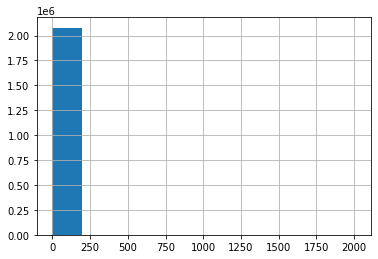

In [46]:
train['age_at_signup'].hist()

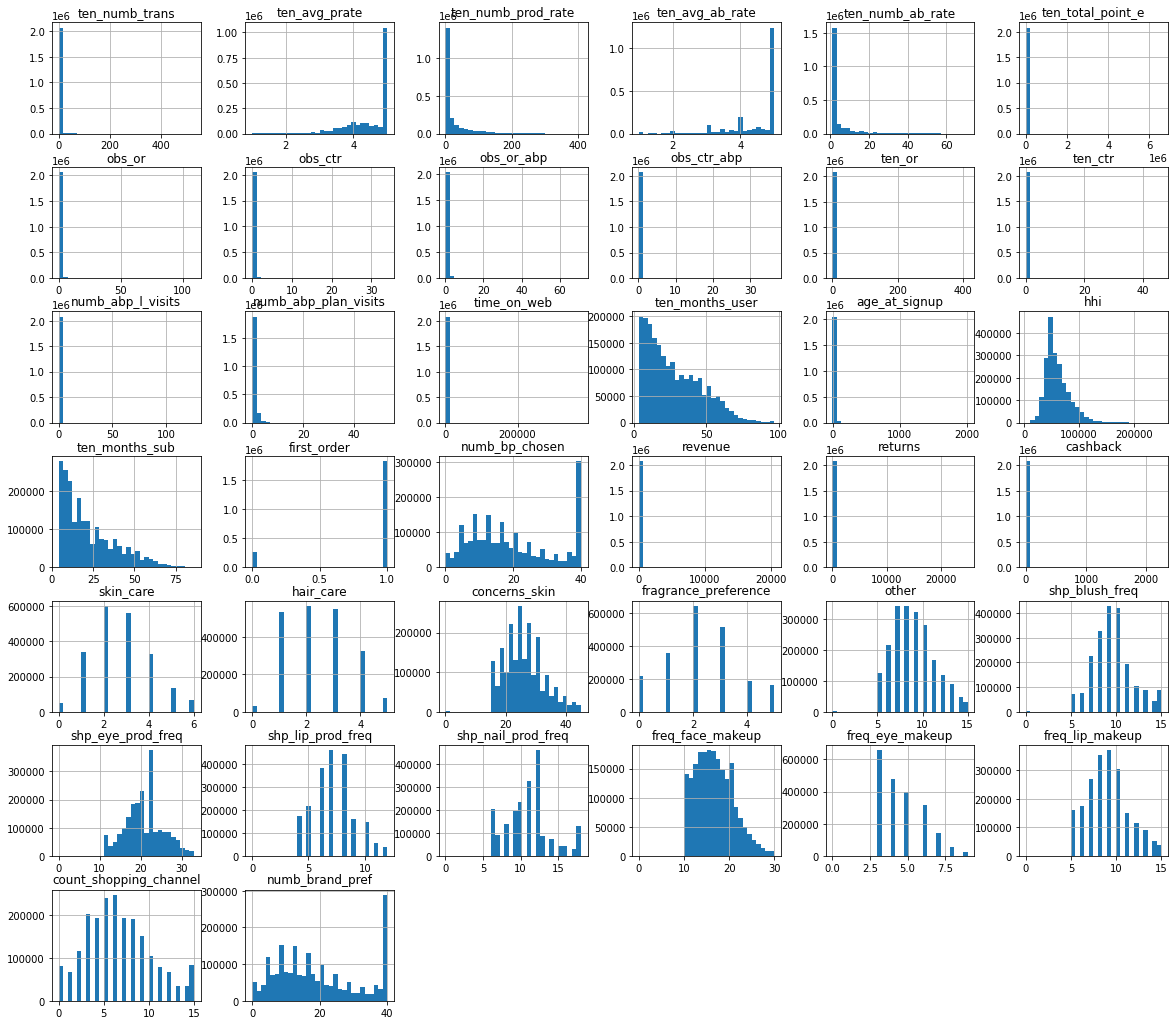

In [44]:
train.hist(bins=30, figsize=(20, 18));

In [38]:
# [x for x in test.columns if x not in train.columns]